![bookstore](bookstore.jpg)


Identifying popular products is incredibly important for e-commerce companies! Popular products generate more revenue and, therefore, play a key role in stock control.

You've been asked to support an online bookstore by building a model to predict whether a book will be popular or not. They've supplied you with an extensive dataset containing information about all books they've sold, including:

* `price`
* `popularity` (target variable)
* `review/summary`
* `review/text`
* `review/helpfulness`
* `authors`
* `categories`

You'll need to build a model that predicts whether a book will be rated as popular or not.

They have high expectations of you, so have set a target of at least 70% accuracy! You are free to use as many features as you like, and will need to engineer new features to achieve this level of performance.

In [132]:
# Import some required packages
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Read in the dataset
books = pd.read_csv("data/books.csv")

# Preview the first five rows
books.head()

,title,price,review/helpfulness,review/summary,review/text,description,authors,categories,popularity
0,We Band of Angels: The Untold Story of America...,10.88,2/3,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular
1,Prayer That Brings Revival: Interceding for Go...,9.35,0/0,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular
2,The Mystical Journey from Jesus to Christ,24.95,17/19,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular
3,Death Row,7.99,0/1,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular
4,Sound and Form in Modern Poetry: Second Editio...,32.50,18/20,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular


In [133]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15719 entries, 0 to 15718
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               15719 non-null  object 
 1   price               15719 non-null  float64
 2   review/helpfulness  15719 non-null  object 
 3   review/summary      15719 non-null  object 
 4   review/text         15719 non-null  object 
 5   description         15719 non-null  object 
 6   authors             15719 non-null  object 
 7   categories          15719 non-null  object 
 8   popularity          15719 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


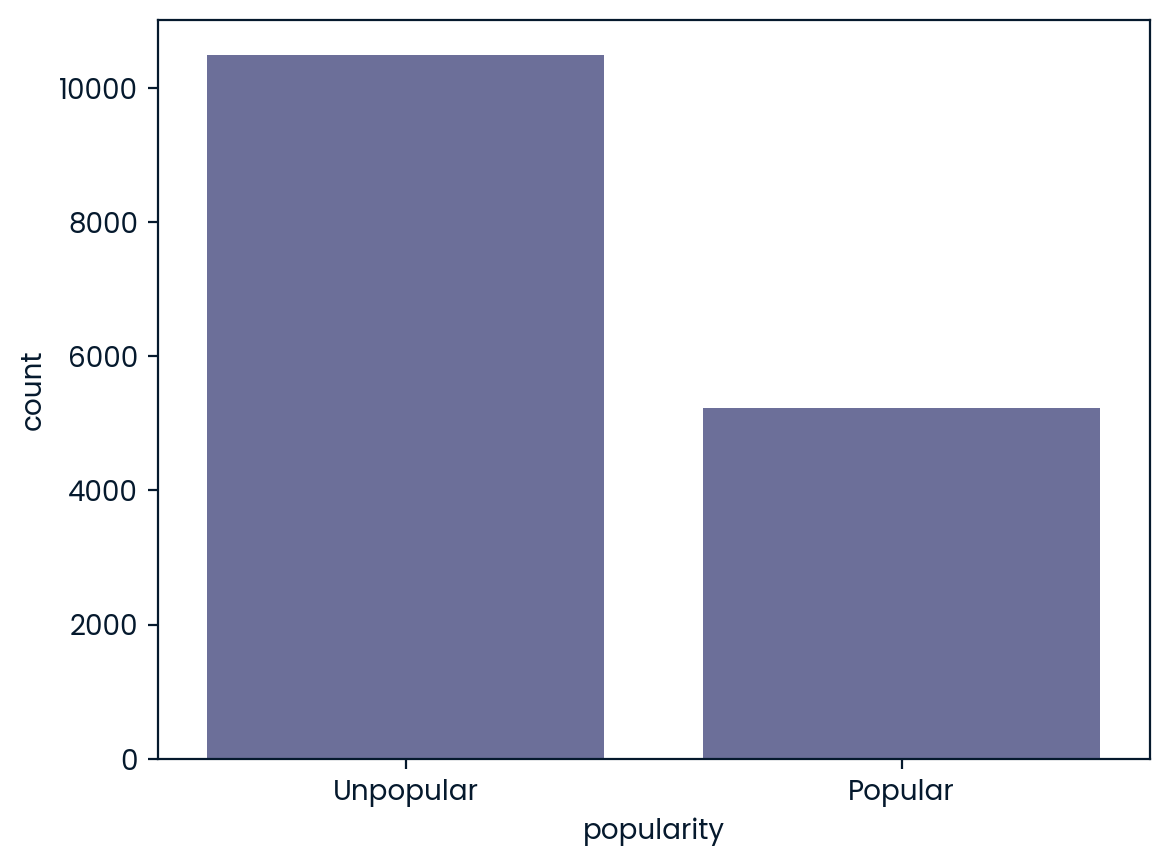

In [134]:
sns.countplot(data=books, x="popularity")
plt.show()

In [135]:
helpfulness_split = books['review/helpfulness'].str.split('/', expand=True)
books['num_helpful'] = helpfulness_split[0].astype(int)
books['num_reviews'] = helpfulness_split[1].astype(int)


In [136]:
books["perc_helpful_reviews"] = books["num_helpful"] / books["num_reviews"]
books["perc_helpful_reviews"].fillna(0, inplace=True)

In [137]:
books.drop(columns=["review/helpfulness"], inplace=True)

In [138]:
books.head()

,title,price,review/summary,review/text,description,authors,categories,popularity,num_helpful,num_reviews,perc_helpful_reviews
0,We Band of Angels: The Untold Story of America...,10.88,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman','History',Unpopular,2,3,0.666667
1,Prayer That Brings Revival: Interceding for Go...,9.35,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho','Religion',Unpopular,0,0,0.000000
2,The Mystical Journey from Jesus to Christ,24.95,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',"'Body, Mind & Spirit'",Unpopular,17,19,0.894737
3,Death Row,7.99,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris','Social Science',Unpopular,0,1,0.000000
4,Sound and Form in Modern Poetry: Second Editio...,32.50,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",'Poetry',Unpopular,18,20,0.900000


In [139]:
books = pd.get_dummies(books, columns=['categories'], drop_first=True)

In [140]:
books.head()

,title,price,review/summary,review/text,description,authors,popularity,num_helpful,num_reviews,perc_helpful_reviews,"categories_""Children's poetry""","categories_""Children's poetry, English""","categories_""Children's stories""","categories_'44 Scotland Street (Edinburgh, Scotland : Imaginary place)'",categories_'Abused children',categories_'Actresses',categories_'Adjoining landowners',categories_'Adobe Acrobat',categories_'Adoptees',categories_'Adultery',categories_'Afghanistan',"categories_'Africa, Sub-Saharan'",categories_'African American civil rights workers',categories_'African American journalists',categories_'African Americans',categories_'Agape',categories_'Agriculture',categories_'Alcoholic beverages',categories_'Algebra',categories_'American fiction',categories_'Anger',categories_'Animals',categories_'Anthroposophy',categories_'Antiques & Collectibles',categories_'Apologetics',categories_'Apostles',categories_'Architecture',categories_'Arctic regions',categories_'Arson',categories_'Art oratoire',...,categories_'Political Science',categories_'Presidents',categories_'Project management',categories_'Psychology',categories_'Putting (Golf)',categories_'Rabbits',categories_'Reference',categories_'Religion',categories_'Restaurant management',categories_'Rock musicians',categories_'SAP R/3',categories_'Salvation',categories_'Science',categories_'Second Advent',categories_'Self-Help',categories_'Self-confidence',categories_'Sex instruction for men',categories_'Silhouettes',categories_'Simonov carbine',"categories_'Sinclair, Paul (Fictitious character)'",categories_'Social Science',categories_'Spiritual life',categories_'Sports & Recreation',categories_'St. Albans (England)',categories_'Study Aids',categories_'Sunflowers',categories_'Teachers',categories_'Technology & Engineering',categories_'Transportation',categories_'Travel',categories_'True Crime',categories_'Turning (Lathe work)',categories_'Twi language',categories_'United States',categories_'War stories',categories_'Werewolves',"categories_'World War, 1914-1918'","categories_'World War, 1939-1945'",categories_'Young Adult Fiction',categories_'Young Adult Nonfiction'
0,We Band of Angels: The Untold Story of America...,10.88,A Great Book about women in WWII,I have alway been a fan of fiction books set i...,"In the fall of 1941, the Philippines was a gar...",'Elizabeth Norman',Unpopular,2,3,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Prayer That Brings Revival: Interceding for Go...,9.35,Very helpful book for church prayer groups and...,Very helpful book to give you a better prayer ...,"In Prayer That Brings Revival, best-selling au...",'Yong-gi Cho',Unpopular,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Mystical Journey from Jesus to Christ,24.95,Universal Spiritual Awakening Guide With Some ...,The message of this book is to find yourself a...,THE MYSTICAL JOURNEY FROM JESUS TO CHRIST Disc...,'Muata Ashby',Unpopular,17,19,0.894737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Death Row,7.99,Ben Kincaid tries to stop an execution.,The hero of William Bernhardt's Ben Kincaid no...,"Upon receiving his execution date, one of the ...",'Lynden Harris',Unpopular,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sound and Form in Modern Poetry: Second Editio...,32.50,good introduction to modern prosody,There's a lot in this book which the reader wi...,An updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",Unpopular,18,20,0.900000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0

In [141]:
for col in ["review/summary", "review/text", "description"]:
    books[col] = books[col].str.lower()

In [142]:
positive_words = ["great", "excellent", "good", "interesting", "thrilling"]

In [143]:
vectorizer = CountVectorizer(vocabulary=positive_words)
review_text = books["review/text"]
text_transformed = vectorizer.fit_transform(review_text.fillna(''))

In [144]:
review_summary = books["review/summary"]
summary_transformed = vectorizer.fit_transform(review_summary.fillna(''))

In [145]:
description = books["description"]
description_transformed = vectorizer.fit_transform(description.fillna(''))

In [146]:
books["positive_words_text"] = text_transformed.sum(axis=1).reshape(-1, 1)
books["positive_words_summary"] = summary_transformed.sum(axis=1).reshape(-1, 1)
books["positive_words_description"] = description_transformed.sum(axis=1).reshape(-1, 1)

In [147]:
books.head()

,title,price,review/summary,review/text,description,authors,popularity,num_helpful,num_reviews,perc_helpful_reviews,"categories_""Children's poetry""","categories_""Children's poetry, English""","categories_""Children's stories""","categories_'44 Scotland Street (Edinburgh, Scotland : Imaginary place)'",categories_'Abused children',categories_'Actresses',categories_'Adjoining landowners',categories_'Adobe Acrobat',categories_'Adoptees',categories_'Adultery',categories_'Afghanistan',"categories_'Africa, Sub-Saharan'",categories_'African American civil rights workers',categories_'African American journalists',categories_'African Americans',categories_'Agape',categories_'Agriculture',categories_'Alcoholic beverages',categories_'Algebra',categories_'American fiction',categories_'Anger',categories_'Animals',categories_'Anthroposophy',categories_'Antiques & Collectibles',categories_'Apologetics',categories_'Apostles',categories_'Architecture',categories_'Arctic regions',categories_'Arson',categories_'Art oratoire',...,categories_'Psychology',categories_'Putting (Golf)',categories_'Rabbits',categories_'Reference',categories_'Religion',categories_'Restaurant management',categories_'Rock musicians',categories_'SAP R/3',categories_'Salvation',categories_'Science',categories_'Second Advent',categories_'Self-Help',categories_'Self-confidence',categories_'Sex instruction for men',categories_'Silhouettes',categories_'Simonov carbine',"categories_'Sinclair, Paul (Fictitious character)'",categories_'Social Science',categories_'Spiritual life',categories_'Sports & Recreation',categories_'St. Albans (England)',categories_'Study Aids',categories_'Sunflowers',categories_'Teachers',categories_'Technology & Engineering',categories_'Transportation',categories_'Travel',categories_'True Crime',categories_'Turning (Lathe work)',categories_'Twi language',categories_'United States',categories_'War stories',categories_'Werewolves',"categories_'World War, 1914-1918'","categories_'World War, 1939-1945'",categories_'Young Adult Fiction',categories_'Young Adult Nonfiction',positive_words_text,positive_words_summary,positive_words_description
0,We Band of Angels: The Untold Story of America...,10.88,a great book about women in wwii,i have alway been a fan of fiction books set i...,"in the fall of 1941, the philippines was a gar...",'Elizabeth Norman',Unpopular,2,3,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,Prayer That Brings Revival: Interceding for Go...,9.35,very helpful book for church prayer groups and...,very helpful book to give you a better prayer ...,"in prayer that brings revival, best-selling au...",'Yong-gi Cho',Unpopular,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Mystical Journey from Jesus to Christ,24.95,universal spiritual awakening guide with some ...,the message of this book is to find yourself a...,the mystical journey from jesus to christ disc...,'Muata Ashby',Unpopular,17,19,0.894737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Death Row,7.99,ben kincaid tries to stop an execution.,the hero of william bernhardt's ben kincaid no...,"upon receiving his execution date, one of the ...",'Lynden Harris',Unpopular,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
4,Sound and Form in Modern Poetry: Second Editio...,32.50,good introduction to modern prosody,there's a lot in this book which the reader wi...,an updated and expanded version of a classic a...,"'Harvey Seymour Gross', 'Robert McDowell'",Unpopular,18,20,0.900000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [148]:
books.drop(columns=["review/text", "review/summary", "description"], inplace=True)

In [149]:
X = books.drop(columns=["title", "authors", "popularity"]).values
y = books["popularity"].values.reshape(-1, 1)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = RandomForestClassifier(n_estimators=200, max_depth=80, min_samples_split=7, random_state=42)
clf.fit(X_train, y_train.ravel()) 

RandomForestClassifier(max_depth=80, min_samples_split=7, n_estimators=200,
                       random_state=42)

In [151]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

model_accuracy = clf.score(X_test, y_test)

0.8999602385685884
0.7010178117048346
